<a href="https://colab.research.google.com/github/JackieLan88/75problems/blob/master/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear *Regression*
Jacqueline Landi -- IBM-Machine Learning with Python

Objectives

- use scikit-learn to implement simple linear regression
- create, train, and test a linear regression model on real data


Their are various fields you could use regression and there are many algorithms.

- linear and polynomial regression are statistical modeling methods

Regression is a machine learning technique that models the relationship between continuous target variables and explanatory features

in simple regression, a single independent variables estimates a dependent variable(non-linear or linear)

If there are more the 1 independent variables, this is called multiple regression



In [ ]:
# import needed packages

!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:

# dataset that we will use that is residing inside the url
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

df = pd.read_csv(url) # convert data into dataframe

df.sample(5) # verify succesful load with some randomly selected records

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
510,2014,HYUNDAI,SANTA FE SPORT,SUV - SMALL,2.4,4,A6,X,11.6,8.7,10.3,27,237
590,2014,JEEP,PATRIOT,SUV - SMALL,2.0,4,M5,X,10.2,7.8,9.1,31,209
653,2014,LAND ROVER,RANGE ROVER V8 5.0 SC FFV,SUV - STANDARD,5.0,8,AS8,Z,17.2,12.5,15.1,19,347
753,2014,MERCEDES-BENZ,E 63 AMG S 4MATIC WAGON,STATION WAGON - MID-SIZE,5.5,8,AS7,Z,15.5,11.0,13.5,21,310
697,2014,MAZDA,CX-5 4WD,SUV - SMALL,2.0,4,AS6,X,9.3,7.6,8.5,33,196


# **Understand the data**

fuelconsumption.csv contains vehicle information such a retail price in canada, taings and estimated carbon dioxide emissions

Our tasks is to create a simpole linear regression model from on these features to predict co2 emissions of unobserved cars based on that feature

In [ ]:
df.describe() # outputs statistics summaries



,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
# selecting some features or variables that can considered a factor toward co2 emisssions anc create a sub dataframe
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

# FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
# FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
# CO2 EMISSIONS (g/km) e.g. 182

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
152,2.4,4,8.2,189
829,2.0,4,8.7,200
467,3.6,6,12.6,290
59,3.0,6,11.6,267
304,5.7,8,12.8,294
335,1.4,4,7.2,166
821,2.0,4,11.6,267
174,6.2,8,14.8,340
802,1.6,4,8.3,191


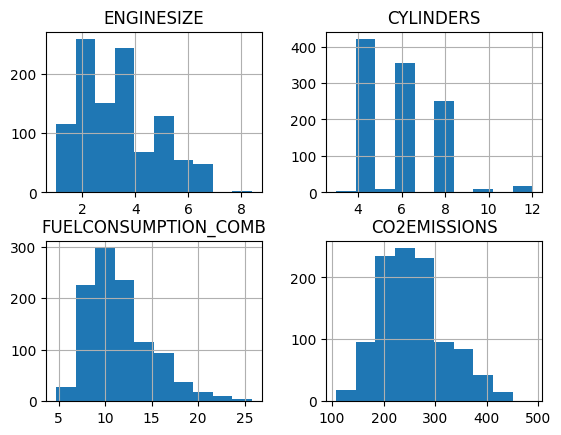

In [ ]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]# - short for visualization dataset
viz.hist()
plt.show()

Most engines with 4,6 and 8 cylinders and engine sizes between 2 and 4 liters are most often used

combines fuel consumption and co2 emisions have a similar distribution in the above histograms

let's try to visualize some scatterplots of these features against co2 emissions

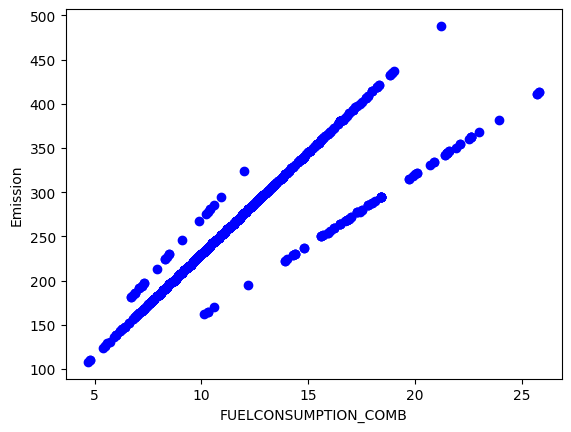

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

 Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

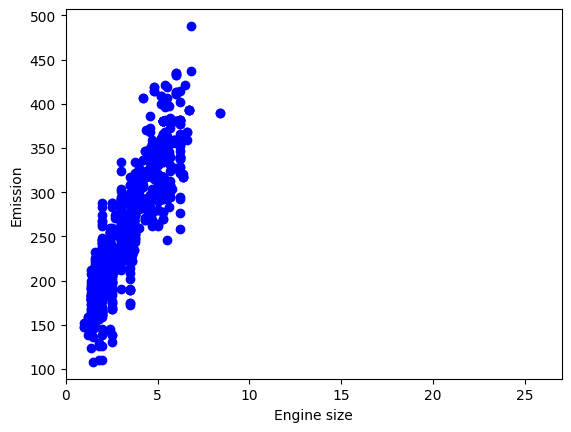

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27) # - sets the limits of the x‑axis in your plot.
plt.show()

Practice exercise 1 - plot cylinder against co2 emission to see how linear their relationship is

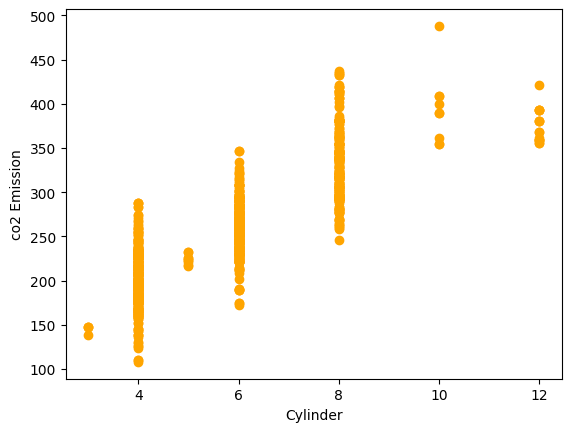

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='orange')
plt.xlabel("Cylinder")
plt.ylabel("co2 Emission")
plt.show()

## Extract the Input Feature and Labels from the Dataset

you will use the engine size to predict the co2 emission with a linear regression model.

In [ ]:
# we will begin the process by extracting the input feature
# and the target output variables, X and Y from the dataset
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()# converts a pandas Series (or DataFrame) into a NumPy array


## **Create Train and Test Datasets**

we will now split the dataset into mutuallt exclusive training and testing sets

you will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data(date that hasn't been exposed) by using it to make predictions on the unseen testing data

*training* -- 80% of the dataset
*testing*` --- 20& of the dataset

Which fraction to use here mostly depends on the size of your data, ubut typical sizes ranges from 20% to 30%

The smaller your data, the larger your training set needs to be because it's easier to find spurious(not being what it purports to be; false or fake.) patterns in smaller data.

The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

- **Generalizability** is a model's ability to perform well not just on the data it was trained on, but also on new, unseen data.
- A dataset that supports generalizability is one that is representative of the real-world population you care about.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

type(X_train), np.shape(X_train), np.shape(Y_train)

# type(X_train) → tells you the object type
# (e.g., <class 'numpy.ndarray'> if you started with a NumPy array,
# or <class 'pandas.core.frame.DataFrame'> if you started with a DataFrame).
# np.shape(X_train) --- gives the dimensions of the training set (rows × columns).

(numpy.ndarray, (853,), (853,))

## **Build a simple linear regression model**

[Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [ ]:
from sklearn import linear_model
#create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1D array but the sklearn models expect a 2D array as input
# for the training data, with shape(n_observations,n_features)
# So we need to reshape it. We can let it infer the number of observations
# using '-1'

regressor.fit(X_train.reshape(-1,1),Y_train)

# print the coefficients
print('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coef, here we extract the 1 by 1 array
print('Intercept: ', regressor.intercept_)

# these two pieces of data are the regression parameters determined by the model
# they define the slope and intercept of the best-fit line to the training data


Coefficients:  38.992978724434074
Intercept:  126.28970217408721


## **Visualize model outputs**

You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data

The regression model is the line given by:
y = intercept + coefficient * x

Text(0, 0.5, 'Emission')

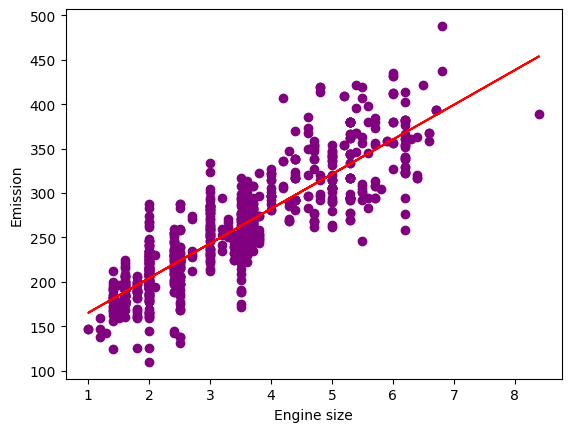

In [ ]:
plt.scatter(X_train, Y_train, color='purple')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## **Model Evaluation**

You can compare the actual values and predicted values to calculate the accuracy of a regression model.

Evaluation metrics play a key role in the development of a model, as they provide insight inot aread that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:


*   Mean Absolute Error: it is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since its just an average error
*   Mean Squared Error(MSE): MSE is the mean of the squared error. In fact, its the mtric used by the model to find the best fit line, and for that reason, it is also called "the residual sum of squares"
*  Root Mean Squared Error(RMSE): simply transforms the MSE into the same units as the variable being compared, which can make it easier to interpret
*  R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represnet how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it cann be negative(becuase the model can be arbitrarily worse).





In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# use the predict method to make the test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# evaluation
print("Mean absolute error %.2f" %mean_absolute_error(Y_test,y_test_))
print("Mean squared error %.2f" %mean_squared_error(Y_test,y_test_))
print("Root mean squared error %.2f" %np.sqrt(mean_squared_error(Y_test,y_test_)))
print("R2-score: %.2f" % r2_score(Y_test,y_test_))

Mean absolute error 24.10
Mean squared error 985.94
Root mean squared error 31.40
R2-score: 0.76


Practice exercises

1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.

Text(0, 0.5, 'Emission')

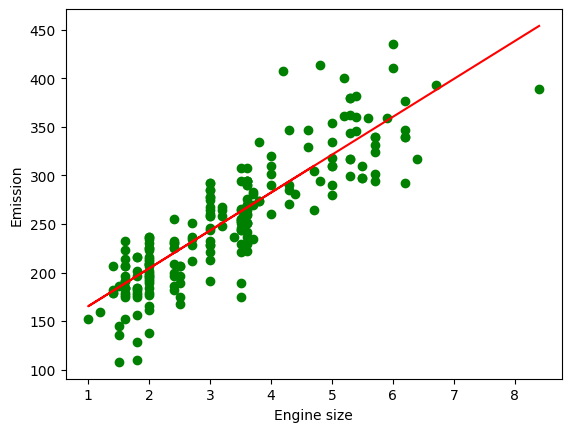

In [ ]:
plt.scatter(X_test,Y_test, color="green")
plt.plot(X_test,regressor.coef_ * X_test + regressor.intercept_,'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.¶

In [ ]:
x = cdf.FUELCONSUMPTION_COMB.to_numpy()

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

type(X_train), np.shape(X_train), np.shape(y_train)

(numpy.ndarray, (853,), (853,))

3. Train a linear regression model using the training data you created.(Remember to transform your 1D feature into a 2D array.)

In [ ]:
regr = linear_model.LinearRegression()

regr.fit(X_train.reshape(-1,1), y_train)

print ('Coefficients: ', regr.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regr.intercept_)

Coefficients:  16.180900781199195
Intercept:  69.10302617988444


4. Use the model to make test predictions on the fuel consumption testing data.

In [ ]:
y_test_ = regr.predict(X_test.reshape(-1,1))

5. Calculate and print the Mean Squared Error of the test predictions.

In [ ]:
# evaluation
print("Mean squared error %.2f" %mean_squared_error(y_test_,y_test))

Mean squared error 797.43


As you might expect from your exploratory analysis, the MSE is smaller when we train using FUELCONSUMPTION_COMB rather than ENGINESIZE.